<a href="https://colab.research.google.com/github/AudryBarimbane/Python_Machine_Learning/blob/main/03_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PYTHON SKLEARN - MODEL SELECTION : Train_test_split, Cross Validation, GridSearchCV**

Train set(80%) : entrainer le modèle
Test set (20%) : évaluer le modèle 
On a deux tableaux :
1. Xtrain ,Ytrain et Xtest , Ytest
model.fit(Xtrain ,Ytrain)
model.score(Xtest , Ytest)

Fonction train_test_split() du module model_selection



In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 

(150, 4)


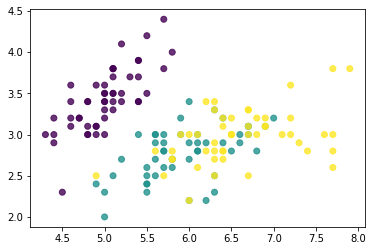

In [4]:
iris = load_iris()

X = iris.data
y = iris.target 

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

In [5]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

print('Train set:',X_train.shape)
print('Test set:',X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

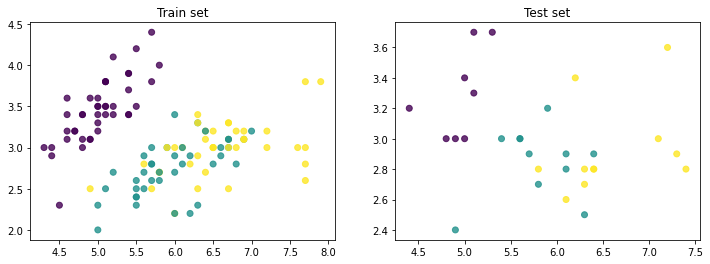

In [15]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:, 0],X_test[:, 1],c=y_test, alpha=0.8)
plt.title('Test set')


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
print('Train score:',model.score(X_train, y_train))
print('test  score: ',model.score(X_test,y_test))

Train score: 0.9833333333333333
test  score:  0.9666666666666667


Validation set   

Améliorer le modèle 
train set , val set , test set

**Cross validation **

In [22]:
from sklearn.model_selection import  cross_val_score


In [27]:
# nombres de split :cv , métrique pour évaluer le modèle scoring ='accuracy'
cross_val_score(KNeighborsClassifier(2),X_train,y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

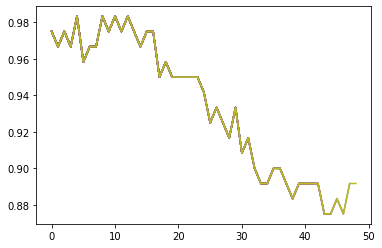

In [28]:
val_score =[]
for k in range(1,50):
  score=cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
  val_score.append(score)

  plt.plot(val_score)

Fonction validation curve 

validatio_curve(model, X_train, y_train, 'hyperparamètre', valeurs, cv=5)
validation_curve : train score , val score 

--Teste toutes les valeurs pour un hyperparamètre donné

Calcule le score sur train set et val set grâce à la cross validation

Exemple : 49 valeurs sont testées avec cv=5 
     --alors train score ,val score sont de dimensions (49,5)

In [29]:
from sklearn.model_selection import validation_curve


In [33]:
model = KNeighborsClassifier()
k = np.arange(1,50) # tableau numpy allant de 1 à 50

train_score, val_score  = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)

val_score.shape


(49, 5)

In [34]:
val_score

array([[1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [0.95833333, 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
       [1.        , 1.        , 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.91666667, 1.

In [35]:
val_score.mean(axis=1)

array([0.975     , 0.96666667, 0.975     , 0.96666667, 0.98333333,
       0.95833333, 0.96666667, 0.96666667, 0.98333333, 0.975     ,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.96666667,
       0.975     , 0.975     , 0.95      , 0.95833333, 0.95      ,
       0.95      , 0.95      , 0.95      , 0.95      , 0.94166667,
       0.925     , 0.93333333, 0.925     , 0.91666667, 0.93333333,
       0.90833333, 0.91666667, 0.9       , 0.89166667, 0.89166667,
       0.9       , 0.9       , 0.89166667, 0.88333333, 0.89166667,
       0.89166667, 0.89166667, 0.89166667, 0.875     , 0.875     ,
       0.88333333, 0.875     , 0.89166667, 0.89166667])

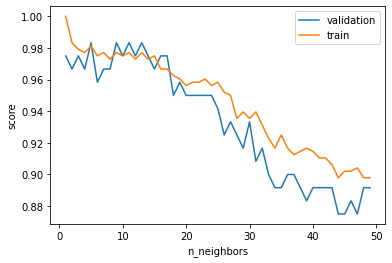

In [37]:
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

Overfitting : le modèle s'est trop perfectionné sur le Trainset et a perdu soon sens de généralisation 
Réperage overfitting :  
   --Bon Train score
   --Mauvais test score
  
   Sur les algorithmes de KNeighbors , on est très souvent dans le cas d'overfitting quand le nombre de voisins est égal  à 1

   

On peut  atteindre les bonnes perfomances de 98% avec le graphique ci-dessous  , en choisissant la bonne valeur pour l'hyperparamètre n_neighbors.
Dans l'agorithme KNN , il existe d'autres hyperparamètres que le n_neighbors par exemple : le type de distance(distance de manahttan,euclidian distance ) , on peut aussi choisir d'accorder des coefficients sur nos distance, du coup en règlant ces autres hyperparamètres, on peut peut être améliorer les performances 
Pour tester toutes ses combinaisons , le mieux c'est d'utiliser GridSearchCV


**GridSearchCV**

GridSearchCV : nous permet de trouver le modèle avec les meilleurs hyperparamètres en comparant les différentes performances de chaque combinaison grâce à la technique de cross validation 

GridSearchCV(model, parm_grid, cv)
 --construit une grille de modèles avec toutes les combinaisons d'hyperparamètres présents dans param_grid

     hyperparamètres :
      --metric(euclidian,manhattan,minkowski)
      --n_neighbors

In [38]:
from sklearn.model_selection import GridSearchCV

In [41]:
#dictionnaires contenant les différents hyperparamètres
param_grid =  {'n_neighbors':np.arange(1,20),
               'metric':['euclidean','manahttan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
#au final on a une grille avec plusieurs estimateurs
#entraine la grille avec la méthode fit comme s'il s'agisse d un estimateur
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manahttan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Metric 'manahttan' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['brute']) to get valid options. Metric can also be a callable function.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Value

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manahttan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
#modèle avec le meilleur score
grid.best_score_

0.9833333333333334

In [44]:
#meilleur paramètres de  ce modèle
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [45]:
#sauvegarde le modèle 
model = grid.best_estimator_

In [48]:
#tester le modèle sur les données X_test et y_test pour avoir un aperçu de sa performance dans la vraie vie 
model.score(X_test, y_test)

0.9333333333333333

**Confusion matrix**

--Outil de mesure très utile pour évaluer la qualité d'un modèle de classification 

-- montre les erreurs de classement 

In [49]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

**Learning curve(courbes d'apprentissage)**

courbes d'apprentissage : montrent l'évolution des performances du modèle en fonction de la quantité des données qu'on lui forunit 
 --Plus la machine dispose de données pour s'entraine meilleure sera sa perfomance 
 -- la performance finit toujours par atteindre un plafond, si c'est le cas unutile d'avoir plus de données 

 learnng_curve(model,X, y,train_sizes=5)


In [52]:
from sklearn.model_selection import learning_curve

[19 27 36 44 53 61 70 78 87 96]


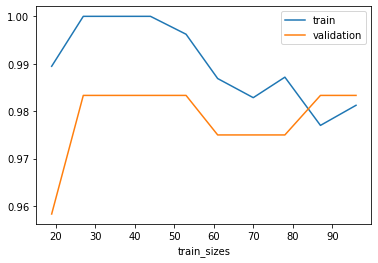

In [61]:
N ,train_score,val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2,1.0,10),cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1),label='train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [63]:
#np.linspace(0.2, 1.0, 5)

#Entrainement,Optimisation,validation ,évaluation  d un modèle
#1.diviser la dataset avec la fonction  train_test_split 
#2.Utiliser l'optimisateur GridSearchCV pour trouver les meilleurs hyperparamètres pour le modèle,cette technique utilise la cross validation
# 2.dénifition d un nombre de split ,définir la stratégie de découpage intéressant 
#3.evaluer le modèle :charge n'importe quelle métrique depuis le module metrics
# utilisation des courbes de validation et courbes d'apprentissage pour vérifier si on est pas en overfitting et pour vérifier si on peut
# encore améliorer notre modèle avec plus de données 
